## **4.3 Работа с датасетом "house price"**

4.1 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.
***

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Считаем скаченный файл

In [3]:
df = pd.read_csv("kc-house-data.csv", encoding="cp1251")

Посмотрим данные

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- **`id`** - Уникальный ID для каждого дома
    - `date` - Дата продажи дома
    - `price` - Стоимость продажи дома
    - `bedrooms` - Кол-во спален
    - `bathrooms` - Кол-во ванных комнат (0.5 - туалет без душа)
    - `sqft_living` - Кв. метры жилые
    - `sqft_lot` - Кв. метры общие
    - `floors` - Кол-во этажей
    - `waterfront` - Есть набержная или нет
    - `view` - Значение от 0 до 4 насколько хороший вид
    - `condition` - Значение от 1 до 5 насколько хорошее состояние
    - `grade` - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
    - `sqft_above` - Кв. метры дома, которые находятся выше земли
    - `sqft_basement` - Кв. метры дома, которые находятся ниже земли
    - `yr_built` - Год постройки дома
    - `yr_renovated` - Год ремонта дома
    - `zipcode` - Индекс
    - `lat` - Широтма
    - `long` - Долгота
    - `sqft_living15` - Кв. метры жилой площади у 15 соседей
    - `sqft_lot15` - Кв. метры общей площади у 15 соседей

### 4.1 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Исключим из анализа следующие признки: `id`, `date` 
</br>И построим матрицу корреляций, чтобы посмотреть взаимосвязи со стоимостью продажи домов. 

In [6]:
analysis_df=df.drop(columns=['id','date'])

Создадим матрицу корреляции без этих признаков и посмотрим на взаимосвязь показателей

In [7]:
price_house = analysis_df.corr(numeric_only=True)
price_house = np.round(price_house,2)
price_house = np.abs(price_house)
price_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,0.05,0.31,0.02,0.59,0.08
bedrooms,0.31,1.00,0.52,0.58,0.03,0.18,0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,0.15,0.01,0.13,0.39,0.03
bathrooms,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,0.12,0.66,0.69,0.28,0.51,0.05,0.20,0.02,0.22,0.57,0.09
sqft_living,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,0.06,0.76,0.88,0.44,0.32,0.06,0.20,0.05,0.24,0.76,0.18
sqft_lot,0.09,0.03,0.09,0.17,1.00,0.01,0.02,0.07,0.01,0.11,0.18,0.02,0.05,0.01,0.13,0.09,0.23,0.14,0.72
floors,0.26,0.18,0.50,0.35,0.01,1.00,0.02,0.03,0.26,0.46,0.52,0.25,0.49,0.01,0.06,0.05,0.13,0.28,0.01
waterfront,0.27,0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,0.03,0.09,0.03,0.01,0.04,0.09,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,0.05,0.10,0.08,0.01,0.08,0.28,0.07
condition,0.04,0.03,0.12,0.06,0.01,0.26,0.02,0.05,1.00,0.14,0.16,0.17,0.36,0.06,0.00,0.01,0.11,0.09,0.00
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,0.14,1.00,0.76,0.17,0.45,0.01,0.18,0.11,0.20,0.71,0.12


<Axes: >

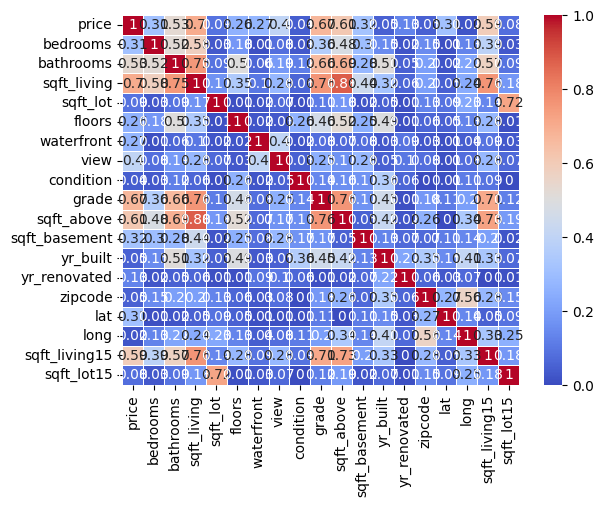

In [8]:
plt.figure()
sns.heatmap(price_house, annot = True, linewidths=0.5 , cmap='coolwarm')

Как видим, что наименьшее влияние оказывают следующие признаки: `bedrooms`, *`sqft_lot`*, `floors`, *`waterfront`*, `view`, *`condition`*, `sqft_basement`, *`yr_built`*, `yr_renovated`, *`zipcode`*, `lat`, *`long`*, `sqft_lot15`
</br>Уберем их из анализа и построим матрицу корреляций, чтобы посмотреть взаимосвязи со стоимостью продажи домов. 

In [9]:
analysis_price = analysis_df.drop(columns=['bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'])

Проверим получившийся DataFrame:

In [10]:
analysis_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   grade          21613 non-null  int64  
 4   sqft_above     21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


Снова потроим матрицу корреляции

In [11]:
price_df = analysis_price.corr(numeric_only=True)
price_df = np.round(price_df,2)
price_df = np.abs(price_df)
price_df

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
price,1.00,0.53,0.70,0.67,0.61,0.59
bathrooms,0.53,1.00,0.75,0.66,0.69,0.57
sqft_living,0.70,0.75,1.00,0.76,0.88,0.76
grade,0.67,0.66,0.76,1.00,0.76,0.71
sqft_above,0.61,0.69,0.88,0.76,1.00,0.73
sqft_living15,0.59,0.57,0.76,0.71,0.73,1.00


<Axes: >

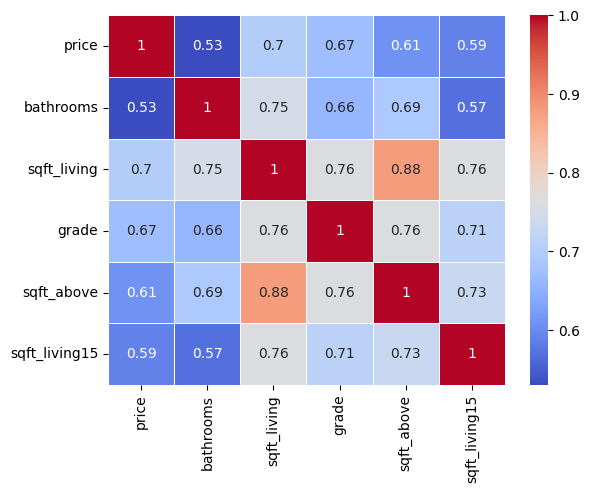

In [12]:
plt.figure()
sns.heatmap(price_df, annot = True, linewidths=0.5 , cmap='coolwarm')

<span style="color:#00FFFF">
<u>Теперь видим что наибольшее влияние на стоимость оказывает:</u> </br>
* жилая площадь дома <i>(sqft_living)</i></br> 
* его класс <i>(grade)</i></br> 
* кв.метры над землей <i>(sqft_above)</i></br> 
* район в котором находится дом (т.е. жилая площадь 15 соседей) <i>(sqft_living15)</i></br>
* и в заключении количество ванных комнат <i>(bathrooms)</i>.</span>

### Построим несколько диаграмм и сделаем анализ в формате storytelling.

Посмотрим информацию по DataFrame для проведения анализа

In [13]:
analysis_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   grade          21613 non-null  int64  
 4   sqft_above     21613 non-null  int64  
 5   sqft_living15  21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


Настроим отображение чисел с плавающей точкой до 2-х знаков

In [14]:
pd.options.display.float_format = '{:.2f}'.format

Посмотрим первичную статистику

In [15]:
analysis_price.describe()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,2.11,2079.90,7.66,1788.39,1986.55
std,367127.20,0.77,918.44,1.18,828.09,685.39
min,75000.00,0.00,290.00,1.00,290.00,399.00
25%,321950.00,1.75,1427.00,7.00,1190.00,1490.00
50%,450000.00,2.25,1910.00,7.00,1560.00,1840.00
75%,645000.00,2.50,2550.00,8.00,2210.00,2360.00
max,7700000.00,8.00,13540.00,13.00,9410.00,6210.00


### 4.1.1 Анализ классов домов

In [16]:
data_grade = analysis_price["grade"].value_counts()
data_grade

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

Создадим столбчатую диаграмму распределения домов по классу.

Text(0.5, 1.0, 'Распределение по домов по классу')

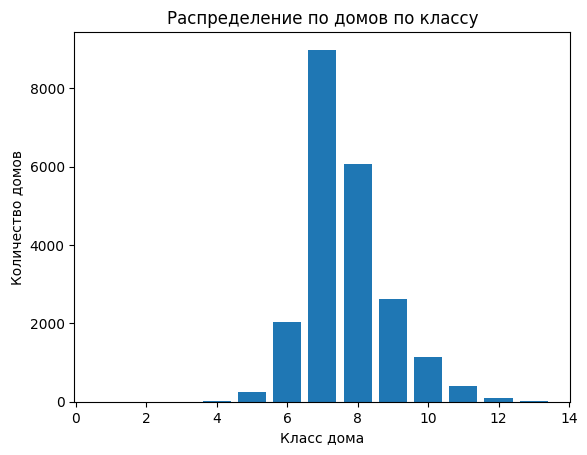

In [17]:
plt.figure()
plt.bar(data_grade.index, data_grade.values)
plt.xlabel("Класс дома")
plt.ylabel("Количество домов")
plt.title("Распределение по домов по классу")

Построим график усов распределения домов по классу

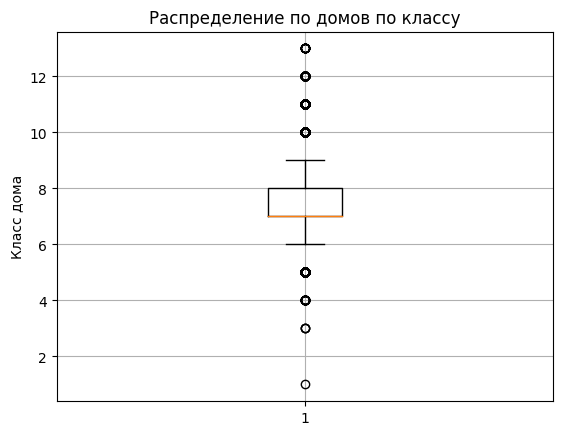

In [18]:
plt.figure()
plt.boxplot(analysis_price['grade'])  
plt.ylabel('Класс дома')
plt.title('Распределение по домов по классу')
plt.grid()

Видим, что основные продажи домов 7-8 класса. </br>Построим круговую диаграмму и посмотрим на % соотношение от всего количества. 

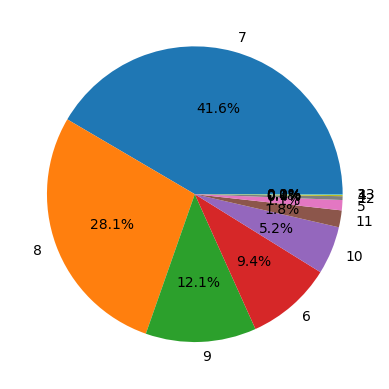

In [19]:
plt.figure()
plt.pie(data_grade.values, labels=data_grade.index, autopct="%.1f%%");

<span style="color:#00FFFF">
<u>Вывод:</u> </br>
Большинство домов более 7 класса, а именно среднего значения. А этот показатель благоприятно влияет на стоимость.</span>

### 4.1.2 Анализ по количеству ванных комнат

Построим график усов распределения домов по количеству ванных комнат

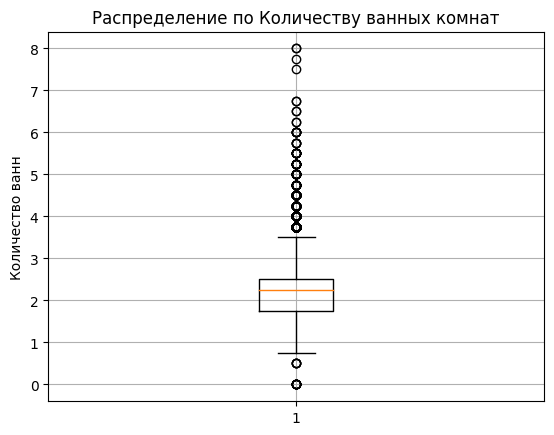

In [20]:
plt.figure()
plt.boxplot(analysis_price['bathrooms'])
plt.ylabel('Количество ванн')
plt.title('Распределение по Количеству ванных комнат')
plt.grid()

In [21]:
bathroom = analysis_price["bathrooms"].value_counts()

Построим круговую диаграмму с отображением % соотношения количества ванных в домах

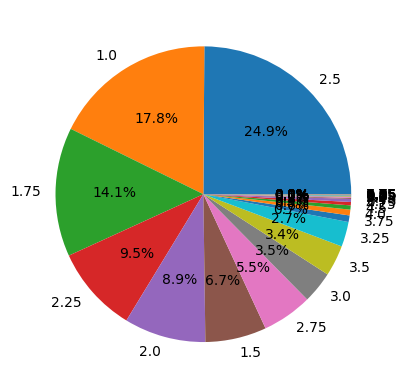

In [22]:
plt.figure()
plt.pie(bathroom.values, labels=bathroom.index, autopct="%.1f%%");

Создадим столбчатую диаграмму распределения по количеству ваннах в домах.

Text(0.5, 1.0, 'Распределение по количеству ванных комнат')

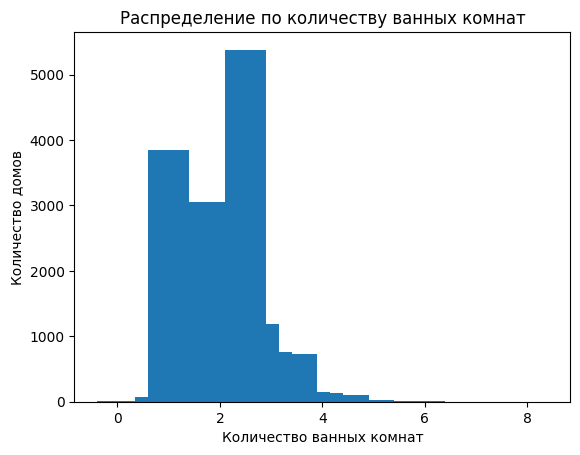

In [23]:
plt.figure()
plt.bar(bathroom.index, bathroom.values)
plt.xlabel("Количество ванных комнат")
plt.ylabel("Количество домов")
plt.title("Распределение по количеству ванных комнат")

<span style="color:#00FFFF">
<u>Вывод:</u> </br>
Наличие ванн, в количестве 1,75-2,5 штук пользуется лучшим спросом у покупателей. Это будет целесообразно учитывать при дальнейшем проектировании.</span>

### 4.1.3 Анализ домов по жилой площади

Создадим гистограмму распределения квадратуры жилой площади в домах

Text(0.5, 1.0, 'Распределение квадратуры жилой площади')

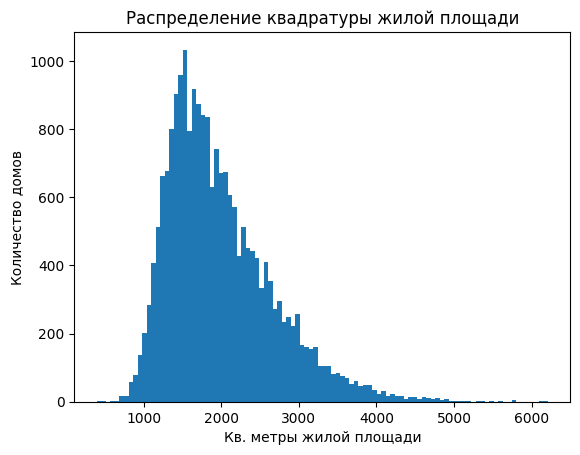

In [24]:
plt.figure()
plt.hist(analysis_price['sqft_living15'],bins= 100)
plt.xlabel('Кв. метры жилой площади')
plt.ylabel('Количество домов')
plt.title('Распределение квадратуры жилой площади')

<span style="color:#00FFFF">
<u>Вывод:</u> </br>
Самая популярная площадь дома 1500-2500 кв.матров, что можно учитывать при строительстве для массового покупателя.</span>

### 4.1.4 Анализ надземной площади дома

Text(0.5, 1.0, 'Распределение по квадратуре надземной части дома')

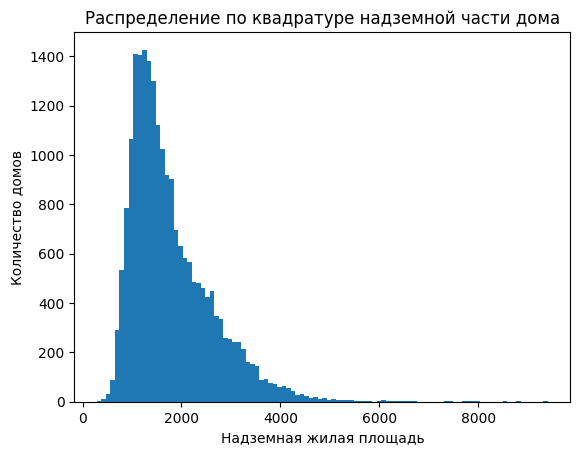

In [25]:
plt.figure()
plt.hist(analysis_price['sqft_above'],bins= 100)
plt.xlabel('Надземная жилая площадь')
plt.ylabel('Количество домов')
plt.title('Распределение по квадратуре надземной части дома')

<span style="color:#00FFFF">
<u>Вывод:</u> </br>
Надземная часть дома играет существенную роль на величину стоимости при продаже, несмотря на наличие цоколькой или подвальной части дома, что следует учитывать при проектировании для снижении дополнительных издержек пр строительстве.</span>

### 4.1.5 Взаимосвязь sqft_above & sqft_living15

Сделаем выборку только по этим признакам

In [26]:
relationship = analysis_price[["sqft_above", "sqft_living"]]
relationship

,sqft_above,sqft_living
0,1180,1180
1,2170,2570
2,770,770
3,1050,1960
4,1680,1680
...,...,...
21608,1530,1530
21609,2310,2310
21610,1020,1020
21611,1600,1600


In [27]:
relationship.describe()

,sqft_above,sqft_living
count,21613.00,21613.00
mean,1788.39,2079.90
std,828.09,918.44
min,290.00,290.00
25%,1190.00,1427.00
50%,1560.00,1910.00
75%,2210.00,2550.00
max,9410.00,13540.00
